### ¿Cómo funciona ReliefF?

ReliefF estima la calidad de las variables basándose en su capacidad para distinguir entre muestras que están cerca unas de otras en el espacio de características.

1.  **Selecciona una muestra aleatoria** (un 'target').
2.  **Encuentra los vecinos más cercanos**: Busca los vecinos más cercanos de la misma clase ('hits') y de clases diferentes ('misses').
3.  **Actualiza el peso**: El peso de una característica aumenta si diferencia a la muestra de sus 'misses' (vecinos de otra clase) y disminuye si la diferencia de sus 'hits' (vecinos de su misma clase).

### En python
- ```python
  !pip install skrebate
  from skrebate import ReliefF
  relieff = ReliefF(n_features_to_select=2, n_neighbors=10)
  relieff.fit(X.values, y)
  ```


In [2]:
!pip install skrebate

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=22ae7921453f02a5f6500c982757de06ae62ea8e91b3ec4b1d9d636eeadc3682
  Stored in directory: /root/.cache/pip/wheels/03/4c/36/bc6b70d88998635e0ec0e617d15cd97483f5008d6bb77c1c7a
Successfully built skrebate


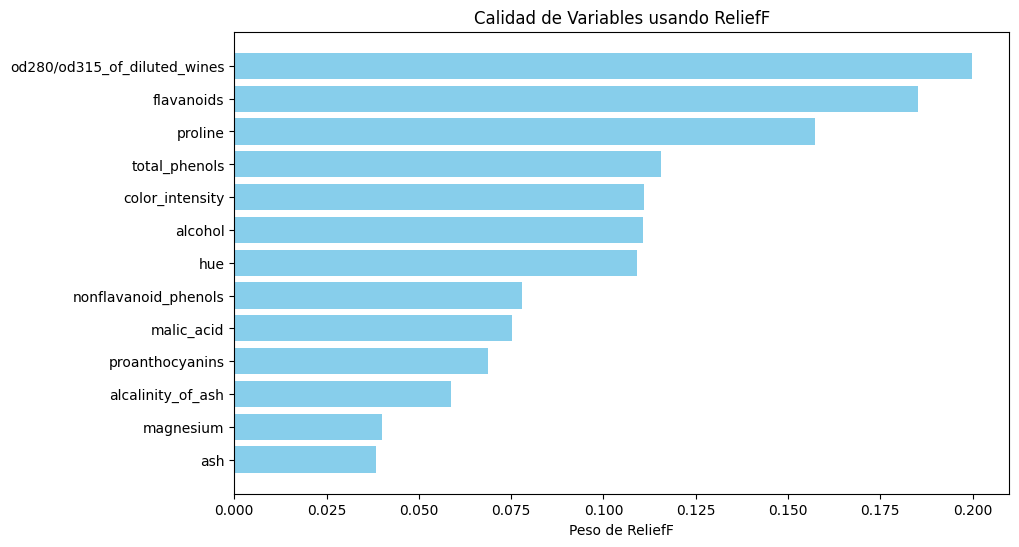

,Variable,Importancia
11,od280/od315_of_diluted_wines,0.199921
6,flavanoids,0.185160
12,proline,0.157308
5,total_phenols,0.115607
9,color_intensity,0.110904
0,alcohol,0.110722
10,hue,0.109223
7,nonflavanoid_phenols,0.077830
1,malic_acid,0.075257
8,proanthocyanins,0.068726


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import load_wine
from skrebate import ReliefF

# 1. Cargar datos
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
feature_names = data.feature_names

# Se ha eliminado 'data.na' ya que causaba un AttributeError.

# 2. Aplicar ReliefF
relieff = ReliefF(n_features_to_select=2, n_neighbors=10)
relieff.fit(X.values, y)

# 3. Obtener los pesos (importancia de las variables)
importances = relieff.feature_importances_

# 4. Visualización
ranking_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
ranking_df = ranking_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Variable'], ranking_df['Importancia'], color='skyblue')
plt.xlabel('Peso de ReliefF')
plt.title('Calidad de Variables usando ReliefF')
plt.gca().invert_yaxis()
plt.show()

display(ranking_df)

